@Time    :   2022/05/06 18:14:18
@Author  :   Yu Zhou 
@Contact :   yuzhou7@illinois.edu

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from planning.config_system import *
from planning.diff_drive import *
from planning.edt_map import *
from planning.misc import *
import cv2 as cv
from tqdm import tqdm
from matplotlib import pyplot as plt

%matplotlib notebook
%load_ext autoreload
%autoreload 2
%load_ext snakeviz 

# Set up

In [59]:
map_loader = LoadMap('../data/map.yaml')
cc, edt_img, off_h, off_w, scale, edt = map_loader.data

cfg = ConfigSystem(configFilename = "../data/diff_drive.yaml", verbose = False)
sys = DiffDriveSys(cfg.value, edt, seed = 0)

zscale: 1.0
Map width: 669.0 and heigt: 488.1
3500 3300
Init differential drive Model
initializing object


<IPython.core.display.Javascript object>


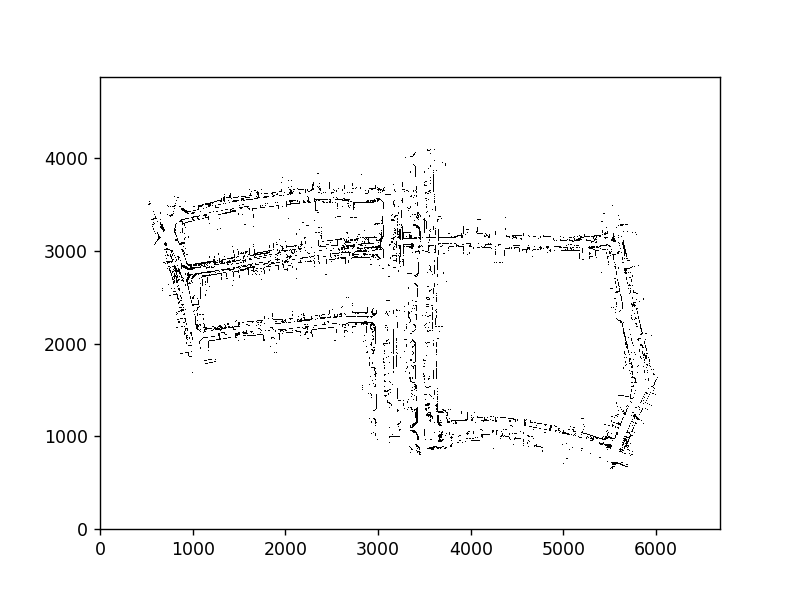

In [60]:
plt.figure()
plt.imshow(cc, cmap ='gray', origin = 'lower')

# Trajertory optimization

In [50]:
# # case 1
# x_cur = [12, 26, -np.pi/4]
# state_tgt = [[x_cur, [30, 37, np.pi/4]]]
# h, w = 700, 700
# offset = [0, 0]

In [48]:
# case 2
x_cur = [17, 15, np.pi/2]
state_tgt = [[x_cur, [20, 28, 0]]]
h, w = 400, 400
offset = [0, 0]

In [61]:
# # sanity check
# fig, ax = plt.subplots(figsize=(4, 4))
# plt.plot(x_cur[0] * scale, x_cur[1] * scale, marker = '^', label='start', linestyle = '')
# plt.plot(state_tgt[0][1][0] * scale, state_tgt[0][1][1] * scale, marker = 'o', label='goal',  linestyle = '') #+str(i)
# plt.imshow(cc[off_h:off_h+h, off_w:off_w+w], cmap='gray', origin='lower')
# plt.xticks(ticks=[i for i in range(0,w,100)], labels=[i for i in range(0,w,10)])
# plt.yticks(ticks=[i for i in range(0,h,100)], labels=[i for i in range(0,h,10)])
# ax.set_xlabel('x (m)', fontsize = 10)
# ax.set_ylabel('y (m)', fontsize = 10)
# ax.legend()
# ax.grid()

In [53]:
states_vis_total =  []
print("cost: tracking, collision, terminal, energy")
for i in range(len(state_tgt)):
    sys.opt = nmpcDiffDrive(sys, edt)
    states_vis, t, found_solution, cost = getState(state_tgt[i][0], state_tgt[i][1], sys = sys, align_heading = False)
    states_vis_total.append(states_vis)

cost: tracking, collision, terminal, energy
initializing object
1.276 0.004 0.001 1.911


<IPython.core.display.Javascript object>


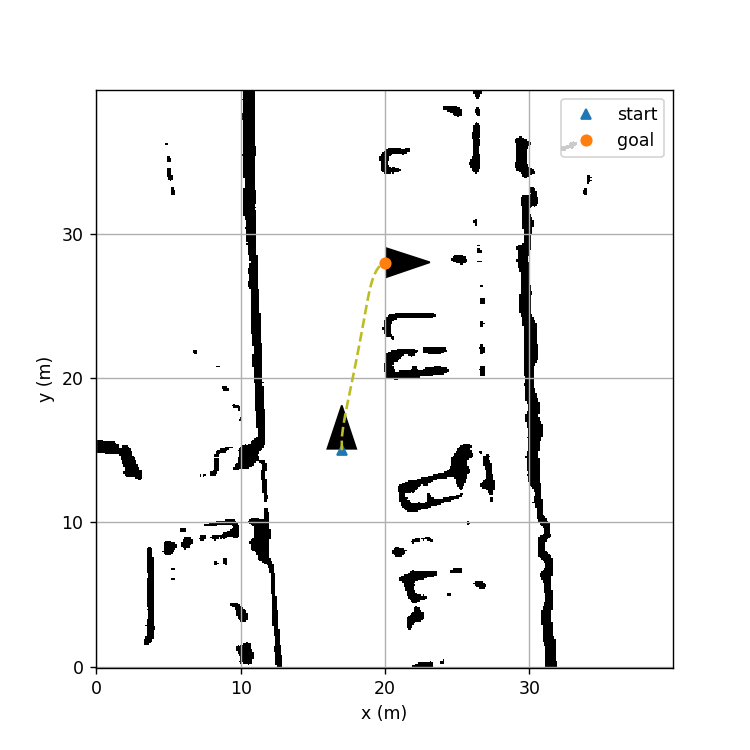

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x_cur[0] * scale + offset[0], x_cur[1] * scale + offset[1], marker = '^', label='start', linestyle = '')
for i in range(len(states_vis_total)):
    states_vis = states_vis_total[i]
    ax.arrow(x_cur[0] * scale + offset[0],  x_cur[1] * scale + offset[1], cos(x_cur[2]), sin(x_cur[2]), head_width=scale*2, head_length=scale*3, fc='k', ec='k')
    ax.arrow(states_vis[-1, 0] * scale + offset[0], states_vis[-1, 1] * scale + offset[1], cos(states_vis[-1, 2]), sin(states_vis[-1, 2]), head_width=scale*2, head_length=scale*3, fc='k', ec='k')
    ax.plot(states_vis[:,0]* scale + offset[0], states_vis[:,1]* scale + offset[1], marker = '',  color='#bcbd22', linestyle = '--')  ##1f77b4
    plt.plot(state_tgt[i][1][0] * scale  + offset[0], state_tgt[i][1][1] * scale  + offset[1], marker = 'o', label='goal',  linestyle = '') #+str(i)
plt.imshow(cc[off_h:off_h+h, off_w:off_w+w], cmap='gray', origin='lower')
# ax.imshow(edt_img[off_h:off_h+h, off_w:off_w+w], origin='lower')
plt.xticks(ticks=[i for i in range(0,w,100)], labels=[i for i in range(0,w,10)])
plt.yticks(ticks=[i for i in range(0,h,100)], labels=[i for i in range(0,h,10)])
ax.set_xlabel('x (m)', fontsize = 10)
ax.set_ylabel('y (m)', fontsize = 10)

ax.legend()
ax.grid()

<IPython.core.display.Javascript object>


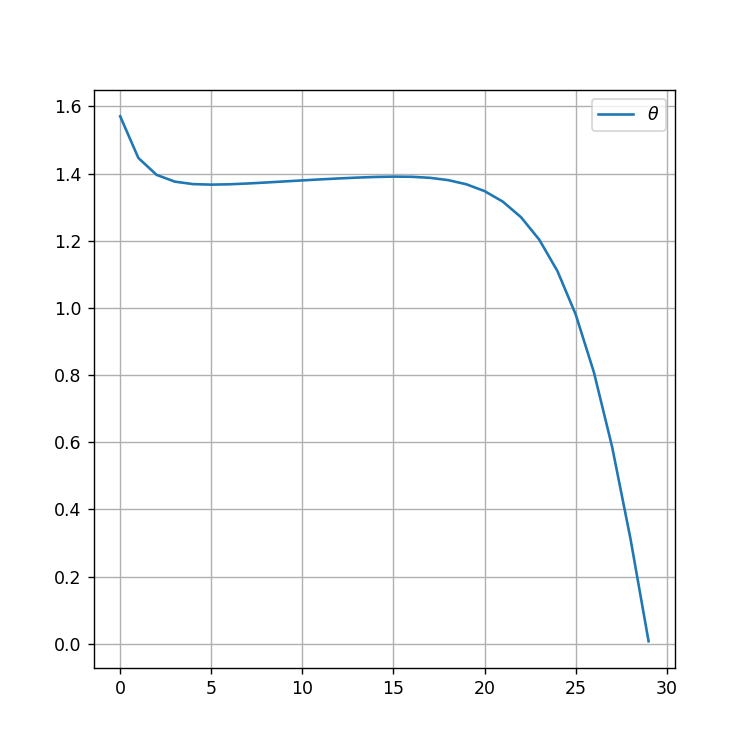

In [62]:
# state and control plot
fig, ax = plt.subplots(figsize=(6, 6))
states_vis = states_vis_total[0]
# ax.plot(states_vis[:,0] + offset[0]/scale, marker = '', label = "x")
# ax.plot(states_vis[:,1] + offset[1]/scale, marker = '', label = "y")  
ax.plot(states_vis[:,2], marker = '', label = r"$\theta$")  
ax.legend()
ax.grid()

# Cost Function

<IPython.core.display.Javascript object>


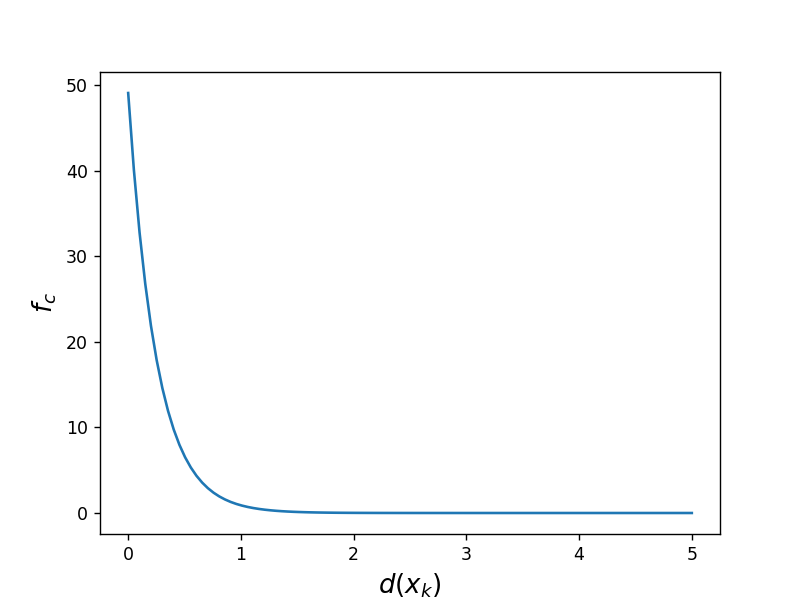

Text(0, 0.5, '$f_c$')

In [63]:
x = np.linspace(0, 5, 100)
a, b = 4, 2
y = np.exp(-a*(x-0.8))*b
plt.figure()
plt.plot(x, y)
plt.xlabel(r'$d(x_k)$', fontSize = 15)
plt.ylabel(r'$f_c$',  fontSize = 15)